# 1. importing supporting libraries 


In [1]:
import  pandas as pd
import numpy as np
import json
import requests
import tweepy
import json
from tweepy import OAuthHandler
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import re
import time


In [2]:
# to display results for the entire cell not only last
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

# 2. Date Gathering


### 2.1. firstly, Gathering "Enhanced Twitter Archive" file



In [3]:
# By importing CSV file to pandas dateframe
df_twitter_arc = pd.read_csv('twitter-archive-enhanced.CSV')

### 2.2. secondely, Gathering "Image_predictions" file

In [4]:
# By Using requests library to download tsv file hosted on udacity server

url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
df_image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

335079

### 2.3. thirdly, Gathering " tweet_json" file

In [5]:
# I chose the approach of accesing Date without creating twitter account and follwed the instructions.
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
"""""""""
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

"""""""""
# Reading the json txt file line by line and save it as a dateframe
tweets_data = []
with open('tweet_json.txt')as file:
    for line in file :
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue
df_api = pd.DataFrame(tweets_data, columns= list(tweets_data[0].keys()))

# to know the exact names of the created dateframe to retrive the needed ones only. 
df_api.info()
df_api.head(n=5)

'\nconsumer_key = \'HIDDEN\'\nconsumer_secret = \'HIDDEN\'\naccess_token = \'HIDDEN\'\naccess_secret = \'HIDDEN\'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:\n# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to\n# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv\n# NOTE TO REVIEWER: this student had mobile verification issues so the following\n# Twitter API code was sent to this student from a Udacity instructor\n# Tweet IDs for which to gather additional data via Twitter\'s API\ntweet_ids = df_1.tweet_id.values\nlen(tweet_ids)\n\n# Query Twitter\'s API for JSON data for each tweet ID in the Twitter archive\ncount = 0\nfails_dict = {}\nstart = timer()\n# Save each tweet\'s returned JSON as a new line in a .txt file\nwith open(\'tweet_json.txt\', \'w\') as o

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8853,39467,False,False,False,False,en
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,6514,33819,False,False,False,False,en
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,4328,25461,False,False,False,False,en
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8964,42908,False,False,False,False,en
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,9774,41048,False,False,False,False,en


In [6]:
# to make a filterd dateframe from the json txt file and rename id correctly.
df_Json= df_api[['id','favorite_count', 'retweet_count','created_at','retweeted' ]]
df_Json= df_Json.rename(columns= {'id':'tweet_id', 'retweeted' : 'retweeted_status'})

   ######                                                                    End of Date Gathering procedure.

# 3.Data Assesing

## 3.1 Firstly, assesing "Enhanced Twitter Archive"

In [7]:
# we use 5 functions to assess the date
# a.to know the data types in the dataframe and their counts
df_twitter_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
#b.to see the first 10 raws of the dataframe
df_twitter_arc.head(n=10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
#c.to see the last 10 raws in the dataframe.
df_twitter_arc.tail(n=10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [10]:
#d. to see random raws of the dateframe.
df_twitter_arc.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1103,735256018284875776,NaN,NaN,2016-05-24 23:47:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kellogg. He accidentally opened the fr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/735256018...,8,10,Kellogg,doggo,None,None,None
148,863427515083354112,8.634256e+17,77596200.0,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
214,851464819735769094,NaN,NaN,2017-04-10 16:00:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Iggy. He was a rescue dog killed in th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/851464819...,14,10,Iggy,None,None,None,None
958,751456908746354688,NaN,NaN,2016-07-08 16:44:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a pupper that's very hungry but too laz...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751456908...,12,10,None,None,None,pupper,None
1877,675109292475830276,NaN,NaN,2015-12-11 00:26:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",C'mon guys. We've been over this. We only rate...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675109292...,9,10,a,None,None,None,None
1956,673612854080196609,NaN,NaN,2015-12-06 21:19:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeffri. He's a speckled ice pupper. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673612854...,7,10,Jeffri,None,None,pupper,None
525,809084759137812480,NaN,NaN,2016-12-14 17:16:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wallace. You said you brushed your tee...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/809084759...,11,10,Wallace,None,None,None,None
1430,697575480820686848,NaN,NaN,2016-02-11 00:18:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ole. He's not sure how to gravity. 8/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697575480...,8,10,Ole,None,None,None,None
1795,677314812125323265,NaN,NaN,2015-12-17 02:30:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Tassy &amp; Bee. Tassy is pretty chill, b...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/677314812...,10,10,Tassy,None,None,None,None
1626,684800227459624960,NaN,NaN,2016-01-06 18:14:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Theodore. He's dapper as hell. Probably o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684800227...,11,10,Theodore,None,None,None,None


In [11]:
# e. to see the decriptive statstics of the dateframe.
df_twitter_arc.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
#checking the accuracy of the dog names
df_twitter_arc.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Oliver       11
           ... 
Charl         1
Tassy         1
Meatball      1
Creg          1
Bones         1
Name: name, Length: 957, dtype: int64

In [13]:
#checking the values of the dog stage columns.
df_twitter_arc.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [14]:
df_twitter_arc.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [15]:
df_twitter_arc.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

df_twitter_arc.puppo.value_counts()

In [16]:
#checking their readablity of source column
df_twitter_arc.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [17]:
# checking the outliers of the rating_denominator and rating_numerator.
#we followed the rule of outliers are values above than the mean with 2 s.d units 
outliers_rating_denominator = (i > 22 for i in df_twitter_arc.rating_denominator)
outliers_rating_numerator = (i > 103 for i in df_twitter_arc.rating_numerator)
print(sum(outliers_rating_denominator))
print(sum(outliers_rating_numerator))


13
11


In [18]:
# checking the invalid rating_denominator that is above than 10 or less than 10
invalid_rating_denominator = (i > 10 or i < 10 for i in df_twitter_arc.rating_denominator)
print(sum(invalid_rating_denominator))

23


In [19]:
#checking of the duplicated raws in the entire dataframe
duplicated = list(df_twitter_arc.tweet_id.value_counts()[df_twitter_arc.tweet_id.value_counts() > 1].index)
print(duplicated)

[]


## 3.2. Secondly, assesing "image_predictions"

In [20]:
# we use 4 functions to assess the date
# a.to know the data types in the dataframe and their counts
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
#b.to see the first 10 raws of the dataframe
df_image_predictions.head(n=10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [22]:
#c.to see the last 10 raws in the dataframe.
df_image_predictions.tail(n=10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [23]:
#d.to see random raws of the dateframe.
df_image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1292,751583847268179968,https://pbs.twimg.com/media/Cm4phTpWcAAgLsr.jpg,1,dalmatian,0.868304,True,studio_couch,0.059623,False,snow_leopard,0.013876,False
1581,796484825502875648,https://pbs.twimg.com/media/Cw2uty8VQAAB0pL.jpg,1,cocker_spaniel,0.116924,True,seat_belt,0.107511,False,Australian_terrier,0.099843,True
1084,718540630683709445,https://pbs.twimg.com/media/CfjE5FRXEAErFWR.jpg,2,Maltese_dog,0.632289,True,West_Highland_white_terrier,0.187055,True,cairn,0.044413,True
1617,802323869084381190,https://pbs.twimg.com/media/CyJtSmDUAAA2F9x.jpg,4,home_theater,0.765069,False,television,0.203578,False,entertainment_center,0.018644,False
1604,800388270626521089,https://pbs.twimg.com/media/CxuM3oZW8AEhO5z.jpg,2,golden_retriever,0.359860,True,Pembroke,0.194207,True,collie,0.154603,True
754,688211956440801280,https://pbs.twimg.com/ext_tw_video_thumb/68821...,1,bannister,0.369449,False,four-poster,0.105307,False,shoji,0.098767,False
1086,718631497683582976,https://pbs.twimg.com/media/CfkXiX6W4AAmICF.jpg,1,Pomeranian,0.993718,True,Pekinese,0.003611,True,Persian_cat,0.000525,False
2033,883482846933004288,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True
36,666447344410484738,https://pbs.twimg.com/media/CT-yU5QWwAEjLX5.jpg,1,curly-coated_retriever,0.322084,True,giant_schnauzer,0.287955,True,Labrador_retriever,0.166331,True
365,672898206762672129,https://pbs.twimg.com/media/CVadWcCXIAAL4Sh.jpg,1,motor_scooter,0.835819,False,bobsled,0.035856,False,moped,0.033079,False


In [24]:
# e. to see the decriptive statstics of the dateframe.
df_image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [25]:
# checking of the duplicated tweets
sum(df_image_predictions.tweet_id.duplicated())
duplicated = list(df_image_predictions.tweet_id.value_counts()[df_image_predictions.tweet_id.value_counts() > 1].index)
print(duplicated)

0

[]


In [26]:
# checking of the duplicated images
sum(df_image_predictions.jpg_url.duplicated())

66

## 3.3. Thirdly, assesing "tweet_json"

In [27]:
# we use 4 functions to assess the date
# a.to know the data types in the dataframe and their counts
df_Json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2354 non-null   int64 
 1   favorite_count    2354 non-null   int64 
 2   retweet_count     2354 non-null   int64 
 3   created_at        2354 non-null   object
 4   retweeted_status  2354 non-null   bool  
dtypes: bool(1), int64(3), object(1)
memory usage: 76.0+ KB


In [28]:
#b.to see the first 10 raws of the dataframe
df_Json.head(n=10)

,tweet_id,favorite_count,retweet_count,created_at,retweeted_status
0,892420643555336193,39467,8853,Tue Aug 01 16:23:56 +0000 2017,False
1,892177421306343426,33819,6514,Tue Aug 01 00:17:27 +0000 2017,False
2,891815181378084864,25461,4328,Mon Jul 31 00:18:03 +0000 2017,False
3,891689557279858688,42908,8964,Sun Jul 30 15:58:51 +0000 2017,False
4,891327558926688256,41048,9774,Sat Jul 29 16:00:24 +0000 2017,False
5,891087950875897856,20562,3261,Sat Jul 29 00:08:17 +0000 2017,False
6,890971913173991426,12041,2158,Fri Jul 28 16:27:12 +0000 2017,False
7,890729181411237888,56848,16716,Fri Jul 28 00:22:40 +0000 2017,False
8,890609185150312448,28226,4429,Thu Jul 27 16:25:51 +0000 2017,False
9,890240255349198849,32467,7711,Wed Jul 26 15:59:51 +0000 2017,False


In [29]:
#c.to see the last 10 raws in the dataframe.
df_Json.tail(n=10)

,tweet_id,favorite_count,retweet_count,created_at,retweeted_status
2344,666058600524156928,115,61,Mon Nov 16 01:01:59 +0000 2015,False
2345,666057090499244032,304,146,Mon Nov 16 00:55:59 +0000 2015,False
2346,666055525042405380,448,261,Mon Nov 16 00:49:46 +0000 2015,False
2347,666051853826850816,1253,879,Mon Nov 16 00:35:11 +0000 2015,False
2348,666050758794694657,136,60,Mon Nov 16 00:30:50 +0000 2015,False
2349,666049248165822465,111,41,Mon Nov 16 00:24:50 +0000 2015,False
2350,666044226329800704,311,147,Mon Nov 16 00:04:52 +0000 2015,False
2351,666033412701032449,128,47,Sun Nov 15 23:21:54 +0000 2015,False
2352,666029285002620928,132,48,Sun Nov 15 23:05:30 +0000 2015,False
2353,666020888022790149,2535,532,Sun Nov 15 22:32:08 +0000 2015,False


In [30]:
#d.to see random raws of the dateframe.
df_Json.sample(10)

,tweet_id,favorite_count,retweet_count,created_at,retweeted_status
105,871879754684805121,39090,11918,Tue Jun 06 00:01:46 +0000 2017,False
1836,675898130735476737,1774,653,Sun Dec 13 04:40:46 +0000 2015,False
2200,668643542311546881,939,576,Mon Nov 23 04:13:37 +0000 2015,False
1259,710153181850935296,3153,1006,Wed Mar 16 17:18:07 +0000 2016,False
1632,684225744407494656,1369,239,Tue Jan 05 04:11:44 +0000 2016,False
1294,707969809498152960,2941,1097,Thu Mar 10 16:42:10 +0000 2016,False
972,750056684286914561,3444,1011,Mon Jul 04 20:00:23 +0000 2016,False
1635,684195085588783105,2108,595,Tue Jan 05 02:09:54 +0000 2016,False
1541,689557536375177216,2257,519,Tue Jan 19 21:18:22 +0000 2016,False
1159,723912936180330496,4236,1374,Sat Apr 23 16:34:28 +0000 2016,False


In [31]:
# e. to see the decriptive statstics of the dateframe.
df_Json.describe()

,tweet_id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [32]:
# checking of the duplicated tweets
sum(df_Json.tweet_id.duplicated())
duplicated = list(df_Json.tweet_id.value_counts()[df_Json.tweet_id.value_counts() > 1].index)
print(duplicated)

0

[]


## Quality :

### a) df_twitter_arc

*  nondescriptive columns for : (tweet_id)
*  incorrect variable types for : (in_reply_to_status_id , in_reply_to_user_id , retweeted_status_user_id and retweeted_status_id). they are float but integer is more accurat.
* incorrect variable types for (timestamp and retweeted_status_timestamp). they are object but date is more accurate.
* twitter archive has 181 tweet that is retweet, shown by the non NaN retweeted_status_id columns.
*  missing is not standardised some called None and some called NaN**.
* column name contains inaccurate names.**
* source column is difficult to read.
* urls in text and expanded url can be merged in one column.**
* ratings are sometimes float but is not shown in its columns.(inaccurate) 
* rating_denominator has invalid values above and below threshold '10'.(inconsistent)
* further there is outliers in rating_numerator and rating_denominator.(outliers)  





### b) df_image_predictions

* since this dateframe has 2074 which is less than twitter archive. i.e some of twitter archive data has no image.
* Non-descriptive column names for some variables.
* the 3 breed prdections algorthims may revert to non-dogs e.g. banana !
* the beereds are not accuretly written  as they are lowercase.
* 66 tweets have same url image.**


### c) df_Json

* created_at is object instead of date.

Note : the lines with ** we will not solve.

## Tidiness:

* df_twitter_arc contains 4 categories (doggo, floofer, pupper, puppo)  of the same varible meaning "stage".
*  there are 3 dataframes for same obsevational units.
* 2 duplicated crearted_at columns that is more full in df_Json. 



# 4.Cleaning Data

In [33]:
# copying our original 3 dataframe.
df_twitter_arc_clean = df_twitter_arc.copy()
df_image_predictions_clean = df_image_predictions.copy()
df_Json_clean = df_Json.copy()

## Qaulity:

## * Define

1.1 define Non descriptive columns: tweet_id, jpg_url , img_num p1 , p1_conf , p1_dog , p2 , p2_conf , p2_dog , p3 , p3_conf , p3_dog

## * clean 
## **Metadata**
**tweet_id** : since tweeter makes a uniqe id for each single tweet, this is a unique string identifier for the tweet.

**jpg_url** : it is the dog's Image url.

**img_num** : it is the number of the image of a certail dog and takes value from 1 to 4.

**p1** : it is the algorithm's #1 prediction for the image in the tweet → e.g. golden retriever.

**p1_conf**: it is how confident the algorithm is in its #1 prediction → e.g.95%

**p1_dog**: it is whether or not the #1 prediction is a breed of dog → e.g.TRUE

**p2**: it is the algorithm's second most likely prediction → e.g. Labrador retriever

**p2_conf**: it is how confident the algorithm is in its #2 prediction → e.g. 1%

**p2_dog**: it is whether or not the #2 prediction is a breed of dog →e.g. TRUE


## * Define
1.2 correct Incorrect columns types

## * Clean

In [34]:
df_twitter_arc_clean['retweeted_status_timestamp'] = pd.to_datetime(df_twitter_arc_clean.retweeted_status_timestamp)
df_twitter_arc_clean['timestamp'] = pd.to_datetime(df_twitter_arc_clean.timestamp)
df_twitter_arc_clean['in_reply_to_status_id'] = df_twitter_arc_clean['in_reply_to_status_id'].astype(str)
df_twitter_arc_clean['in_reply_to_user_id'] = df_twitter_arc_clean['in_reply_to_user_id'].astype(str)
df_twitter_arc_clean['retweeted_status_id'] = df_twitter_arc_clean['retweeted_status_id'].astype(str)
df_twitter_arc_clean['retweeted_status_user_id'] = df_twitter_arc_clean['retweeted_status_user_id'].astype(str)
df_Json_clean['created_at'] = pd.to_datetime(df_Json_clean.created_at)

## * test

In [35]:
df_twitter_arc_clean.info()
df_Json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       2356 non-null   object             
 2   in_reply_to_user_id         2356 non-null   object             
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         2356 non-null   object             
 7   retweeted_status_user_id    2356 non-null   object             
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

## * Define

1.3. fix source column's data to be  accurately written.

## * Clean

In [36]:
# to know the exact names again.
df_twitter_arc_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [37]:
#to replace the sources'names with more easily extracted readable names
df_twitter_arc_clean.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','Twitter for iPhone', inplace=True)
df_twitter_arc_clean.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Vine - Make a Scene', inplace=True)
df_twitter_arc_clean.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter Web Client', inplace=True)
df_twitter_arc_clean.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','TweetDeck', inplace=True)


## *test

In [38]:
df_twitter_arc_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

## Tidiness:

### *   Define


2.1. the 3 data frames will be merged into one master dataframe for the same observational unit "tweet".

### *   clean

In [39]:
df_master = pd.merge(df_twitter_arc_clean, df_image_predictions, how = 'left', on = ['tweet_id'] )
df_master = pd.merge(df_master, df_Json_clean, how = 'left', on = ['tweet_id'])

## * test

In [40]:
df_master.info()
df_master.head(10)
df_master.sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       2356 non-null   object             
 2   in_reply_to_user_id         2356 non-null   object             
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         2356 non-null   object             
 7   retweeted_status_user_id    2356 non-null   object             
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,created_at,retweeted_status
0,892420643555336193,nan,nan,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaT,https://twitter.com/dog_rates/status/892420643...,...,bagel,0.085851,False,banana,0.076110,False,39467.0,8853.0,2017-08-01 16:23:56+00:00,False
1,892177421306343426,nan,nan,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,nan,nan,NaT,https://twitter.com/dog_rates/status/892177421...,...,Pekinese,0.090647,True,papillon,0.068957,True,33819.0,6514.0,2017-08-01 00:17:27+00:00,False
2,891815181378084864,nan,nan,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaT,https://twitter.com/dog_rates/status/891815181...,...,malamute,0.078253,True,kelpie,0.031379,True,25461.0,4328.0,2017-07-31 00:18:03+00:00,False
3,891689557279858688,nan,nan,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,nan,nan,NaT,https://twitter.com/dog_rates/status/891689557...,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908.0,8964.0,2017-07-30 15:58:51+00:00,False
4,891327558926688256,nan,nan,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,nan,nan,NaT,https://twitter.com/dog_rates/status/891327558...,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048.0,9774.0,2017-07-29 16:00:24+00:00,False
5,891087950875897856,nan,nan,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,nan,nan,NaT,https://twitter.com/dog_rates/status/891087950...,...,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,20562.0,3261.0,2017-07-29 00:08:17+00:00,False
6,890971913173991426,nan,nan,2017-07-28 16:27:12+00:00,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,nan,nan,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,Border_collie,0.199287,True,ice_lolly,0.193548,False,12041.0,2158.0,2017-07-28 16:27:12+00:00,False
7,890729181411237888,nan,nan,2017-07-28 00:22:40+00:00,Twitter for iPhone,When you watch your owner call another dog a g...,nan,nan,NaT,https://twitter.com/dog_rates/status/890729181...,...,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,56848.0,16716.0,2017-07-28 00:22:40+00:00,False
8,890609185150312448,nan,nan,2017-07-27 16:25:51+00:00,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,nan,nan,NaT,https://twitter.com/dog_rates/status/890609185...,...,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,28226.0,4429.0,2017-07-27 16:25:51+00:00,False
9,890240255349198849,nan,nan,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,nan,nan,NaT,https://twitter.com/dog_rates/status/890240255...,...,Cardigan,0.451038,True,Chihuahua,0.029248,True,32467.0,7711.0,2017-07-26 15:59:51+00:00,False


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,created_at,retweeted_status
280,839549326359670784,nan,nan,2017-03-08 18:52:12+00:00,Twitter for iPhone,Meet Winston. He knows he's a little too big f...,nan,nan,NaT,https://twitter.com/dog_rates/status/839549326...,...,Norwich_terrier,0.052480,True,Pembroke,0.049901,True,29957.0,8805.0,2017-03-08 18:52:12+00:00,False
1818,676593408224403456,nan,nan,2015-12-15 02:43:33+00:00,Vine - Make a Scene,This pupper loves leaves. 11/10 for committed ...,nan,nan,NaT,https://vine.co/v/eEQQaPFbgOY,...,NaN,NaN,NaN,NaN,NaN,NaN,4954.0,2410.0,2015-12-15 02:43:33+00:00,False
2315,666691418707132416,nan,nan,2015-11-17 18:56:35+00:00,Twitter for iPhone,This is Christoper. He is a spotted Penne. Can...,nan,nan,NaT,https://twitter.com/dog_rates/status/666691418...,...,beagle,0.008687,True,bloodhound,0.005394,True,196.0,51.0,2015-11-17 18:56:35+00:00,False
263,842535590457499648,nan,nan,2017-03-17 00:38:32+00:00,Twitter for iPhone,This is Winnie. She lost her body saving a chi...,nan,nan,NaT,https://twitter.com/dog_rates/status/842535590...,...,Cardigan,0.314608,True,basenji,0.000160,True,19637.0,3937.0,2017-03-17 00:38:32+00:00,False
292,838083903487373313,nan,nan,2017-03-04 17:49:08+00:00,Twitter for iPhone,This is Daisy. She's puppears to be rare as al...,nan,nan,NaT,https://twitter.com/dog_rates/status/838083903...,...,seat_belt,0.164133,False,Pomeranian,0.017981,True,19183.0,3582.0,2017-03-04 17:49:08+00:00,False
360,829861396166877184,nan,nan,2017-02-10 01:15:49+00:00,Twitter for iPhone,This is Mia. She already knows she's a good do...,nan,nan,NaT,https://twitter.com/dog_rates/status/829861396...,...,Staffordshire_bullterrier,0.376574,True,American_Staffordshire_terrier,0.031292,True,13441.0,2243.0,2017-02-10 01:15:49+00:00,False
691,787322443945877504,nan,nan,2016-10-15 16:01:13+00:00,Twitter for iPhone,This is Lincoln. He forgot to use his blinker ...,nan,nan,NaT,https://twitter.com/dog_rates/status/787322443...,...,golden_retriever,0.105703,True,dingo,0.017257,False,8726.0,2032.0,2016-10-15 16:01:13+00:00,False
1910,674416750885273600,nan,nan,2015-12-09 02:34:18+00:00,Twitter for iPhone,This is Jonah. He's a Stinted Fisher Price. En...,nan,nan,NaT,https://twitter.com/dog_rates/status/674416750...,...,Boston_bull,0.250920,True,whippet,0.141012,True,731.0,157.0,2015-12-09 02:34:18+00:00,False
1350,704113298707505153,nan,nan,2016-02-29 01:17:46+00:00,Twitter for iPhone,Meet Stanley. He's an inverted Uzbekistani wat...,nan,nan,NaT,https://twitter.com/dog_rates/status/704113298...,...,mink,0.018231,False,sea_lion,0.015861,False,2031.0,629.0,2016-02-29 01:17:46+00:00,False
2201,668645506898350081,nan,nan,2015-11-23 04:21:26+00:00,Twitter for iPhone,Incredibly rare dog here. Good at bipedalism. ...,nan,nan,NaT,https://twitter.com/dog_rates/status/668645506...,...,knee_pad,0.096881,False,balance_beam,0.084076,False,962.0,588.0,2015-11-23 04:21:26+00:00,False


## * Define

2.2. Columns doggo, floofer, pupper, puppo shall be merged to one column called "stage". 

## * clean



In [41]:
# as when merging theses 4 columns to one, "None" will appear even if there is a value in the stage.
#so we will keep None as Empty word.
df_master.doggo.replace('None', '', inplace=True)
df_master.floofer.replace('None', '', inplace=True)
df_master.pupper.replace('None', '', inplace=True)
df_master.puppo.replace('None', '', inplace=True)

In [42]:
# merging the 4 columns to "stage" column.
df_master['stage'] = (df_master.doggo + df_master.floofer +df_master.pupper + df_master.puppo)
df_master.stage.replace('', 'NaN', inplace=True)

In [43]:
# droping the 4 columns
df_master = df_master.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)


## * test

In [44]:
df_master.stage.value_counts()

NaN             1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: stage, dtype: int64

## * Define


2.3. dropping the duplicated but less comprhensive "timestamp" column.

## * clean

In [45]:
df_master = df_master.drop(['timestamp'], axis=1) 

## * Test

In [46]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       2356 non-null   object             
 2   in_reply_to_user_id         2356 non-null   object             
 3   source                      2356 non-null   object             
 4   text                        2356 non-null   object             
 5   retweeted_status_id         2356 non-null   object             
 6   retweeted_status_user_id    2356 non-null   object             
 7   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 8   expanded_urls               2297 non-null   object             
 9   rating_numerator            2356 non-null   int64              
 10  rating_denominator          2356 non-null   int64           

# Quality :

## * Define
1.4 Deleting tweets that has no images

## * Clean

In [47]:
# Delete tweets with no pictures by taking only the ones who have.
df_master = df_master[pd.notnull(df_master.jpg_url)]

## * test

In [48]:
# testing is the new df_master has been shorted to the same no.of df_image_predictions_clean that is 2075
len(df_master)
df_master.info()

2075

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2075 non-null   int64              
 1   in_reply_to_status_id       2075 non-null   object             
 2   in_reply_to_user_id         2075 non-null   object             
 3   source                      2075 non-null   object             
 4   text                        2075 non-null   object             
 5   retweeted_status_id         2075 non-null   object             
 6   retweeted_status_user_id    2075 non-null   object             
 7   retweeted_status_timestamp  81 non-null     datetime64[ns, UTC]
 8   expanded_urls               2075 non-null   object             
 9   rating_numerator            2075 non-null   int64              
 10  rating_denominator          2075 non-null   int64           

## * Define 
1.5. Deleting retweets. #I am not twitter_user unfortunately to analyze comprehensevely how retweets are/ can be recorded.

Potantially, if any tweet has a value in the varibales contains retweet id, so it is retweet not original tweet.

In [49]:
df_master.retweeted_status_id.value_counts()

nan                      1994
8.29374341691347e+17        1
7.932864763017994e+17       1
7.69940425801171e+17        1
6.67548415174144e+17        1
                         ... 
8.305833205850685e+17       1
7.076109487234785e+17       1
6.733201328113664e+17       1
7.258422890467492e+17       1
8.482893821761004e+17       1
Name: retweeted_status_id, Length: 82, dtype: int64

In [50]:
df_master.retweeted_status_user_id.value_counts()

nan                      1994
4196983835.0               66
4296831739.0                2
597064155.0                 1
280479778.0                 1
41198418.0                  1
1228325660.0                1
487197737.0                 1
363890752.0                 1
783214.0                    1
1732729088.0                1
7.874617784352891e+17       1
811740824.0                 1
512804507.0                 1
726634734.0                 1
341021133.0                 1
Name: retweeted_status_user_id, dtype: int64

In [51]:
df_master.retweeted_status.value_counts()

False    2073
Name: retweeted_status, dtype: int64

so column "retweeted_status_user_id" showed that there is 1994 original tweet but the rest is retweet.

## *clean

In [52]:
# Delete the retweets, by selecting the tweets that has "nan" in retweeted_status_user_id
df_master= df_master.loc[df_master['retweeted_status_user_id'] == 'nan']

## * test

In [53]:
len(df_master)
df_master.retweeted_status_user_id.value_counts()
#cleaning any retweets id or status columns.
df_master = df_master.drop(['retweeted_status_user_id','retweeted_status_id','retweeted_status','retweeted_status_timestamp'], axis=1) 

1994

nan    1994
Name: retweeted_status_user_id, dtype: int64

## *Define
1.6. detecting tweets have float ratings by searching for them in the text and then correcting them to their original values.

## * clean

In [54]:
# retriving those tweets.
#displaing the text tweets to get the original Ratings numerator.
#colwidth chosen by tries but can be from the max text lenght column.
pd.options.display.max_colwidth=250
df_master[df_master.text.str.contains(r"(\d+\.\d*\/\d+)")].loc[:,['tweet_id','text','rating_numerator','rating_denominator']]

C:\Users\ghost\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


So, Clearly there are 4 tweets have ratings of float not integer. further, the incorrectly written integer is the numbers after the decimal point. 

In [55]:
#correcting the rates by calling the tweet from its id and rewritting the rating numerator value.
df_master.loc[df_master.tweet_id == 883482846933004288, 'rating_numerator'] = 13.5
df_master.loc[df_master.tweet_id == 786709082849828864, 'rating_numerator'] = 9.75
df_master.loc[df_master.tweet_id == 778027034220126208, 'rating_numerator'] = 11.27
df_master.loc[df_master.tweet_id == 680494726643068929, 'rating_numerator'] = 11.26

## * Test

In [56]:
#showing them again and seeing their correct rating
df_master[df_master.text.str.contains(r"(\d+\.\d*\/\d+)")].loc[:,['tweet_id','text','rating_numerator','rating_denominator']]
#checking also if rating_numerator has really become float
df_master.info()

C:\Users\ghost\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1994 non-null   int64              
 1   in_reply_to_status_id  1994 non-null   object             
 2   in_reply_to_user_id    1994 non-null   object             
 3   source                 1994 non-null   object             
 4   text                   1994 non-null   object             
 5   expanded_urls          1994 non-null   object             
 6   rating_numerator       1994 non-null   float64            
 7   rating_denominator     1994 non-null   int64              
 8   name                   1994 non-null   object             
 9   jpg_url                1994 non-null   object             
 10  img_num                1994 non-null   float64            
 11  p1                     1994 non-null   object           

## *Define

1.7 deal with incorrectly stage values by searching in the text column.


In [57]:
#retriving those tweets who has 2 names for the dog's stage.
# we used this approach to figure if we can found values for NaN but there is no any stage word in the text
list_repeated= ['doggopupper','doggofloofer','doggopuppo'] 

#colwidth chosen by tries but can be from the max text lenght column.
pd.options.display.max_colwidth=300
repeated_stage_tweets= df_master.loc[df_master['stage'].isin ( list_repeated)]
repeated_stage_tweets.loc[:,['tweet_id','text','stage']]
len(repeated_stage_tweets)

,tweet_id,text,stage
191,855851453814013952,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,doggopuppo
200,854010172552949760,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",doggofloofer
460,817777686764523521,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",doggopupper
531,808106460588765185,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,doggopupper
565,802265048156610565,"Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",doggopupper
575,801115127852503040,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,doggopupper
705,785639753186217984,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,doggopupper
889,759793422261743616,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",doggopupper
956,751583847268179968,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,doggopupper
1063,741067306818797568,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,doggopupper


11

So, there is 11 wrongly written in the stage that can only be corrected by human reading


## * Clean

In [58]:
#correcting the values by calling the tweet from its id and rewritting the stage value.
df_master.loc[df_master.tweet_id == 855851453814013952, 'stage'] = "puppo"
df_master.loc[df_master.tweet_id == 854010172552949760, 'stage'] = "doggo"
df_master.loc[df_master.tweet_id == 817777686764523521, 'stage'] = "doggo"
df_master.loc[df_master.tweet_id == 801115127852503040, 'stage'] = "pupper"
df_master.loc[df_master.tweet_id == 785639753186217984, 'stage'] = "doggo"
#by human understanding 5 tweets can reveal the stage
# but 5 other tweets have  2 dogs and 1 tweet has no dog though it has rating.

## * Test

In [59]:
df_master.stage.value_counts()

NaN            1688
pupper          204
doggo            66
puppo            23
floofer           7
doggopupper       6
Name: stage, dtype: int64

#clearly, we have dealt with the incorrectness of some stage values, others are due to the tweet itself has more than one dog.
#this is another issue of the observational unit

## *Define
1.8 rating_denominator hits its thershold (10) and some tweets has less than 10. This is inconsistent.

so, we need to find both and figure is it really rating, if so, normalize it.

In [60]:
# retriveing the tweets has less than 10 and more than 10 in rating_denominator.
df_master.loc[df_master.rating_denominator < 10].loc[:,['tweet_id','text','rating_denominator']]
df_master.loc[df_master.rating_denominator > 10].loc[:,['tweet_id','text','rating_denominator']]
pd.options.display.max_colwidth=400

,tweet_id,text,rating_denominator
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,7
2335,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,2


,tweet_id,text,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",50
1351,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,50


-for rating denominator < 10 :
Seemed that the 1 tweet has no rating and  another is incorrtly written which is turend to be 9/10 and 24/7 is a contniung expression.


-for rating denominator >10 :
 this tweets have also numerator that is high than 10 which can be normalized also by 
 setting the denominator=10 , then by cross multiplication: new_numerator = ( numerator/denominator)*10

## * clean


In [61]:
# at first, dropping the non rated tweet.
df_master=df_master.loc[df_master.tweet_id != 810984652412424192]

#secondly, rewrite the tweet that is had incorrect writening.
df_master.loc[df_master.tweet_id == 666287406224695296, 'rating_denominator'] = 10
df_master.loc[df_master.tweet_id == 666287406224695296, 'rating_numerator'] = 9

#thirdly , correcting the other tweets
df_master["normalized_numerator"] = (df_master.rating_numerator/df_master.rating_denominator)*10
df_master['rating_numerator'] = np.where((df_master['rating_denominator'] > 10),df_master['normalized_numerator'], df_master['rating_numerator'])  
df_master.loc[df_master.rating_denominator > 10, 'rating_denominator'] = 10    
# we made a new column for normalized_numerator and then fill from its value to the old rating_numerator coluumn.
# eventually, we sticked our rating_denominator thershold.


## * Test

In [62]:
#testing the non-exestence of the dropped tweet
df_master.info()
df_master.loc[df_master.tweet_id== 810984652412424192].loc[:,['tweet_id','text','rating_numerator','rating_denominator']]

#calling the modified tweet
df_master.loc[df_master.tweet_id== 666287406224695296].loc[:,['tweet_id','text','rating_numerator','rating_denominator']]

#testing the non-exestence of the incorrect rating tweet
df_master.loc[df_master.rating_denominator > 10].loc[:,['tweet_id','text','rating_numerator','rating_denominator']]
df_master.rating_denominator.value_counts()

#deleding the normalized_numerator as it is not important any more
df_master = df_master.drop(['normalized_numerator'], axis=1)
df_master.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1993 non-null   int64              
 1   in_reply_to_status_id  1993 non-null   object             
 2   in_reply_to_user_id    1993 non-null   object             
 3   source                 1993 non-null   object             
 4   text                   1993 non-null   object             
 5   expanded_urls          1993 non-null   object             
 6   rating_numerator       1993 non-null   float64            
 7   rating_denominator     1993 non-null   int64              
 8   name                   1993 non-null   object             
 9   jpg_url                1993 non-null   object             
 10  img_num                1993 non-null   float64            
 11  p1                     1993 non-null   object           

,tweet_id,text,rating_numerator,rating_denominator


,tweet_id,text,rating_numerator,rating_denominator
2335,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,9.0,10


,tweet_id,text,rating_numerator,rating_denominator


10    1993
Name: rating_denominator, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1993 non-null   int64              
 1   in_reply_to_status_id  1993 non-null   object             
 2   in_reply_to_user_id    1993 non-null   object             
 3   source                 1993 non-null   object             
 4   text                   1993 non-null   object             
 5   expanded_urls          1993 non-null   object             
 6   rating_numerator       1993 non-null   float64            
 7   rating_denominator     1993 non-null   int64              
 8   name                   1993 non-null   object             
 9   jpg_url                1993 non-null   object             
 10  img_num                1993 non-null   float64            
 11  p1                     1993 non-null   object           

1. the dataframe has really been less by 1 , and when calling it, it does not appear.
2. we retrived the tweet that has been wrongly written and now it is corrected.
3. there is no more invalid rating_denominator as no retrived tweet of a rating_denominator higher than 1
.Also, 1993 tweets has  rating_denominator is 10, so they All right.

## * Define
1.9 Get the dogs predections that their beerd are really dog.
this is by filtering the dataframe based on at least one dog breed is true from the 3 algorthims.

In [63]:
#Correcting the types of them first
df_master['p1_dog'] = df_master['p1_dog'].astype(bool)
df_master['p2_dog'] = df_master['p2_dog'].astype(bool)
df_master['p3_dog'] = df_master['p3_dog'].astype(bool)
#Seeing the names of things that is not a beered of dog
df_master.loc[:,['tweet_id','p1','p1_dog','p2','p2_dog','p3','p3_dog']]

,tweet_id,p1,p1_dog,p2,p2_dog,p3,p3_dog
0,892420643555336193,orange,False,bagel,False,banana,False
1,892177421306343426,Chihuahua,True,Pekinese,True,papillon,True
2,891815181378084864,Chihuahua,True,malamute,True,kelpie,True
3,891689557279858688,paper_towel,False,Labrador_retriever,True,spatula,False
4,891327558926688256,basset,True,English_springer,True,German_short-haired_pointer,True
...,...,...,...,...,...,...,...
2351,666049248165822465,miniature_pinscher,True,Rottweiler,True,Doberman,True
2352,666044226329800704,Rhodesian_ridgeback,True,redbone,True,miniature_pinscher,True
2353,666033412701032449,German_shepherd,True,malinois,True,bloodhound,True
2354,666029285002620928,redbone,True,miniature_pinscher,True,Rhodesian_ridgeback,True


so Clearly, we can see that some dogs_prediction algorthims did not find a real dog breed but something else.

## * Clean

In [64]:
#Filtering based on at least one true dog breed exists from the 3 used algorithms.
df_master= df_master.loc[df_master.index.where(df_master.p1_dog | df_master.p2_dog | df_master.p3_dog).dropna()]

## *Test

In [65]:
#checking the type of the column and the number of the new filterd data
df_master.info()
#cheching if any tweet has 3 false in its breed dog agorthim
df_master.loc[(df_master['p1_dog'] == False ) & (df_master['p2_dog'] == False)& (df_master['p3_dog'] == False)].loc[:,['tweet_id','p1','p1_dog','p2','p2_dog','p3','p3_dog']]


<class 'pandas.core.frame.DataFrame'>
Float64Index: 1685 entries, 1.0 to 2355.0
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1685 non-null   int64              
 1   in_reply_to_status_id  1685 non-null   object             
 2   in_reply_to_user_id    1685 non-null   object             
 3   source                 1685 non-null   object             
 4   text                   1685 non-null   object             
 5   expanded_urls          1685 non-null   object             
 6   rating_numerator       1685 non-null   float64            
 7   rating_denominator     1685 non-null   int64              
 8   name                   1685 non-null   object             
 9   jpg_url                1685 non-null   object             
 10  img_num                1685 non-null   float64            
 11  p1                     1685 non-null   object     

,tweet_id,p1,p1_dog,p2,p2_dog,p3,p3_dog


So, clearly 308 breads where not actually dog breed. since it is inconsistent to include such data and we dropped them successfully.

## * Define
1.9 Capitalize the dog beered name in the the 3 algorthims.

## * Clean


In [66]:
df_master.p1  = df_master.p1.str.title()
df_master.p2  = df_master.p2.str.title()
df_master.p3  = df_master.p3.str.title()

## * Test

In [67]:
df_master.loc[:,['tweet_id','p1','p1_dog','p2','p2_dog','p3','p3_dog']]

,tweet_id,p1,p1_dog,p2,p2_dog,p3,p3_dog
1.0,892177421306343426,Chihuahua,True,Pekinese,True,Papillon,True
2.0,891815181378084864,Chihuahua,True,Malamute,True,Kelpie,True
3.0,891689557279858688,Paper_Towel,False,Labrador_Retriever,True,Spatula,False
4.0,891327558926688256,Basset,True,English_Springer,True,German_Short-Haired_Pointer,True
5.0,891087950875897856,Chesapeake_Bay_Retriever,True,Irish_Terrier,True,Indian_Elephant,False
...,...,...,...,...,...,...,...
2351.0,666049248165822465,Miniature_Pinscher,True,Rottweiler,True,Doberman,True
2352.0,666044226329800704,Rhodesian_Ridgeback,True,Redbone,True,Miniature_Pinscher,True
2353.0,666033412701032449,German_Shepherd,True,Malinois,True,Bloodhound,True
2354.0,666029285002620928,Redbone,True,Miniature_Pinscher,True,Rhodesian_Ridgeback,True


Noting that standardizing the NaN values is also resolved:
    by looking at the info of our df_master contains no NaN. which is also a quality issue.

   ######                                                                    End of Date Assesing procedure.

# 5.Saving our Date into CSV file.

In [68]:
df_master.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index=False)

In [69]:
#to ensure that we can call it
df_master2= pd.read_csv('twitter_archive_master.csv')
df_master2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1685 entries, 0 to 1684
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1685 non-null   int64  
 1   in_reply_to_status_id  20 non-null     float64
 2   in_reply_to_user_id    20 non-null     float64
 3   source                 1685 non-null   object 
 4   text                   1685 non-null   object 
 5   expanded_urls          1685 non-null   object 
 6   rating_numerator       1685 non-null   float64
 7   rating_denominator     1685 non-null   int64  
 8   name                   1685 non-null   object 
 9   jpg_url                1685 non-null   object 
 10  img_num                1685 non-null   float64
 11  p1                     1685 non-null   object 
 12  p1_conf                1685 non-null   float64
 13  p1_dog                 1685 non-null   bool   
 14  p2                     1685 non-null   object 
 15  p2_c

## 6.Analyzing and Visualizing

## 6.1.Visualizing

##### 6.1.1 A pie chart represents the porpotion of the stages in our dataset

NaN            1425
pupper          169
doggo            56
puppo            22
floofer           7
doggopupper       6
Name: stage, dtype: int64

([169, 56, 22, 7, 6], ['pupper', 'doggo', 'puppo', 'floofer', 'doggopupper'])

([<matplotlib.patches.Wedge at 0x217655b6ca0>,
 [Text(-1.528038008148971, 0.6486137877443908, 'pupper'),
  Text(1.1272181366417156, -1.2185972560390819, 'doggo'),
  Text(1.7477309801186234, 0.20745221409663459, 'puppo'),
  Text(1.5703113978564012, 0.7948094826826585, 'floofer'),
  Text(1.4266426601215871, 1.0306748858496562, 'doggopupper')],
 [Text(-0.8100442452837918, 0.34384345374401437, '65.0%'),
  Text(0.5975614218341624, -0.6460033646472242, '21.5%'),
  Text(0.9731683866569608, 0.11551316466744427, '8.5%'),
  Text(0.8743779374427689, 0.44256437103920754, '2.7%'),
  Text(0.7943805721131565, 0.5738985159844676, '2.3%')])

Text(0.5, 1.0, 'stages of the dogs rated in We Rate Dogs Aug 2017 ')

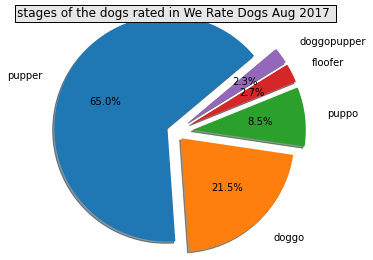

In [70]:
# aquik reminder of the categories of the stages.
df_master["stage"].value_counts()
# to make the counts avoide Nan dog'stage as they are meaningless
frequency_stage = df_master["stage"].loc[(df_master['stage'] != "NaN" )].value_counts() 
labels_list = frequency_stage.index.tolist()    # to make the list labels first
frequency_stage = list(frequency_stage)         # to make the list of the counts
frequency_stage,labels_list                      #to ensure our steps 
my_explode = (0.1, 0.1 , 0.2, 0.2, 0.2)
plt.pie(frequency_stage,labels=labels_list,autopct='%1.1f%%',shadow = True, startangle = 40,radius =1.3,labeldistance =1.2, explode =my_explode)
plt.title("stages of the dogs rated in We Rate Dogs Aug 2017 ",bbox={'facecolor':'0.9', 'pad':2})



# 6.2 Analyzing


1. from the chart named by " stages of the dogs rated in We Rate Dogs  Aug 2017" we can infere the following :
from the tweets that have available stage name, more than half of their dogs are pupper.
In deed , (65%) of the rated dogs are in the "Pupper" stage while "doggo"  dogs porpotion is (21.5%). Floofer is very rare amouted to only (2.7%) analogous to the tweets which has more the 1 dog reached only (2.3%) and has both doggo and pupper dogs.  

2. finding the correlation between 'rating_numerator', 'favorite_count','retweet_count'.

In [71]:
df_master_corr = pd.DataFrame(df_master, columns=['rating_numerator', 'favorite_count','retweet_count'])
df_master_corr.corr()

,rating_numerator,favorite_count,retweet_count
rating_numerator,1.000000,0.424461,0.314499
favorite_count,0.424461,1.000000,0.913173
retweet_count,0.314499,0.913173,1.000000


As expected, the higher rating_numerator, the higher favorite_count and retweet_count infered by the positive sign.
However the relationship is not very strong between rating_numerator and favorite_count  or between rating_numerator and retwee_count(below 0.5), supposingly high rated dogs don't recieve much cheers!.
But the correlation between favorite_count and retwee_count is strong (0.9), normally intutive.     

3. finding the most common dog's beerds of the dogs which lie in the 25% top ratings illustrated by the 3 algorthims.

In [72]:
# finding the 75 th quartile from the descibtion box 
df_master.describe()
#calling the dogs who are in top 25% and whose beerds are confirmed by the 3 algorthims they are really dogs.
top_dog_beerd = df_master.loc[(df_master['rating_numerator']  > 12 ) & (df_master['p1_dog'] == True ) & (df_master['p2_dog'] == True)& (df_master['p3_dog'] == True)].loc[:,['tweet_id','rating_numerator','p1','p2','p3']]
top_dog_beerd

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,1.685000e+03,1685.000000,1685.0,1685.000000,1685.000000,1685.000000,1.685000e+03,1685.000000,1685.000000
mean,7.392284e+17,10.828680,10.0,1.216024,0.604992,0.137207,6.137956e-02,9235.071810,2817.807715
std,6.800380e+16,1.788877,0.0,0.576338,0.266416,0.101252,5.188869e-02,12586.724536,4808.543435
min,6.660209e+17,0.000000,10.0,1.000000,0.044333,0.000010,2.160900e-07,81.000000,16.000000
25%,6.773346e+17,10.000000,10.0,1.000000,0.378643,0.054950,1.596500e-02,2163.000000,649.000000
50%,7.131775e+17,11.000000,10.0,1.000000,0.606654,0.121488,4.998820e-02,4437.000000,1436.000000
75%,7.931657e+17,12.000000,10.0,1.000000,0.850050,0.198451,9.469160e-02,11659.000000,3249.000000
max,8.921774e+17,14.000000,10.0,4.000000,0.999984,0.467678,2.734190e-01,132810.000000,79515.000000


,tweet_id,rating_numerator,p1,p2,p3
1.0,892177421306343426,13.0,Chihuahua,Pekinese,Papillon
7.0,890729181411237888,13.0,Pomeranian,Eskimo_Dog,Pembroke
8.0,890609185150312448,13.0,Irish_Terrier,Irish_Setter,Chesapeake_Bay_Retriever
9.0,890240255349198849,14.0,Pembroke,Cardigan,Chihuahua
10.0,890006608113172480,13.0,Samoyed,Pomeranian,Chow
...,...,...,...,...,...
1885.0,674793399141146624,13.0,Giant_Schnauzer,Afghan_Hound,Miniature_Schnauzer
1886.0,674790488185167872,13.0,Labrador_Retriever,Chesapeake_Bay_Retriever,Rottweiler
1906.0,674468880899788800,13.0,Chow,Pomeranian,Toy_Poodle
2037.0,671561002136281088,13.0,Gordon_Setter,Black-And-Tan_Coonhound,Rottweiler


In [73]:
#finding the most comon breeds along the 3 algorthims
top_dog_beerd.p1.value_counts()
top_dog_beerd.p2.value_counts()
top_dog_beerd.p3.value_counts()

Golden_Retriever               30
Pembroke                       20
Labrador_Retriever             12
Chihuahua                      10
Samoyed                         8
                               ..
Newfoundland                    1
Briard                          1
Curly-Coated_Retriever          1
Black-And-Tan_Coonhound         1
Soft-Coated_Wheaten_Terrier     1
Name: p1, Length: 68, dtype: int64

Labrador_Retriever         22
Cardigan                   17
Pomeranian                 12
Golden_Retriever           11
Siberian_Husky              6
                           ..
Appenzeller                 1
Wire-Haired_Fox_Terrier     1
Rhodesian_Ridgeback         1
Saint_Bernard               1
Lakeland_Terrier            1
Name: p2, Length: 70, dtype: int64

Labrador_Retriever                13
Chihuahua                          9
Kuvasz                             9
Golden_Retriever                   7
Basenji                            6
                                  ..
Siberian_Husky                     1
Samoyed                            1
Scottish_Deerhound                 1
American_Staffordshire_Terrier     1
Dandie_Dinmont                     1
Name: p3, Length: 80, dtype: int64

**So the 25% top rated dogs breeds are :**

**Golden_Retriever**, which exists by 30%, 11% or 7%  according to algorthim 1,2 and 3 respecitevly.

**Labrador_Retriever**, which exists by 22%, 13% or 12%  according to algorthim 3,2 and 1 respecitevly.

**Chihuahua** , which exists by 10% or 9% or   according to algorthim 1 and 3 respecitevly.
              


 **visualizing is tempting !. lets visualize the last insight!.**

###### 6.1.2 A bar chart showing most common beerds in top rated dogs according to p1_algorthim.

<BarContainer object of 4 artists>

Text(0.5, 1.0, 'most common beerds in top rated dogs(p1_algorthim)')

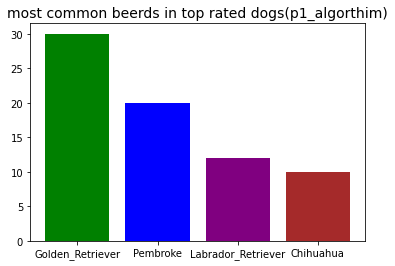

In [74]:
p1_breed = top_dog_beerd["p1"].value_counts()[0:4] 
labels_p1_breed = p1_breed.index.tolist()    # to make the list labels first
p1_breed = list(p1_breed)         
Colors = ['green','blue','purple','brown']
plt.bar(labels_p1_breed,p1_breed, color = Colors)
plt.title('most common beerds in top rated dogs(p1_algorthim)', fontsize=14)


###### 6.1.3 A bar chart showing most common beerds in top rated dogs according to p2_algorthim.

<BarContainer object of 4 artists>

Text(0.5, 1.0, 'most common beerds in top rated dogs(p2_algorthim)')

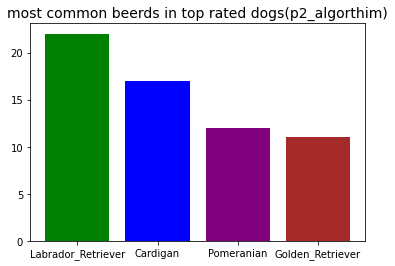

In [75]:
p2_breed = top_dog_beerd["p2"].value_counts()[0:4] 
labels_p2_breed = p2_breed.index.tolist()    # to make the list labels first
p2_breed = list(p2_breed)        
Colors = ['green','blue','purple','brown']
plt.bar(labels_p2_breed,p2_breed,color = Colors)
plt.title('most common beerds in top rated dogs(p2_algorthim)', fontsize=14)


###### 6.1.4 A bar chart showing most common beerds in top rated dogs according to p3_algorthim.

<BarContainer object of 4 artists>

Text(0.5, 1.0, 'most common beerds in top rated dogs(p3_algorthim)')

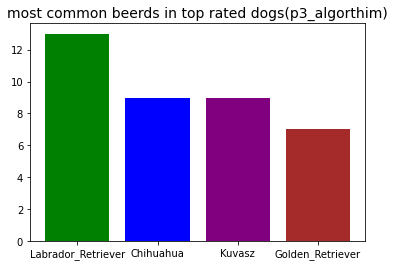

In [76]:
p3_breed = top_dog_beerd["p3"].value_counts()[0:4] 
labels_p3_breed = p3_breed.index.tolist()    # to make the list labels first
p3_breed = list(p3_breed)         
Colors = ['green','blue','purple','brown']
plt.bar(labels_p3_breed,p3_breed,color = Colors)
plt.title('most common beerds in top rated dogs(p3_algorthim)', fontsize=14)
